In [87]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import iris set
iris = load_iris()
print(iris)
#Los datos tienen 4 secciones:
#[longitud-sépalo, ancho-sepalo, longitud-petalo,ancho-petalo]

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

<h2>Separación del dataset</h2>
Lo dividiremos en <b>80%</b> para el <b><em>training</em></b><br>
Y el <b>20%</b> restante serán las <b><em>pruebas</em></b>

In [88]:
#Separación del dataset
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, random_state=42, stratify=iris.target
)

X_train_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_b = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [89]:
#Inicialización de los pesos
X = iris.data
n_features = X.shape[1]
print(n_features) #Aquí podemos ver que tenemos 4 features

theta_Setosa = np.random.rand(n_features,1)
theta_Versicolor = np.random.rand(n_features,1)
theta_Virginica = np.random.rand(n_features,1)

learning_rate = 0.01
n_epochs = 500

4


In [90]:
#Creación del One-Hot

def Crear_One_Hot_set(set):
    One_Hot_set=[]
    class_zero=[1,0,0]
    class_one=[0,1,0]
    class_two=[0,0,1]
    for number in set:
        if number == 0:
            One_Hot_set.append(class_zero)
        elif number == 1:
            One_Hot_set.append(class_one) 
        elif number == 2:
            One_Hot_set.append(class_two)

    return One_Hot_set


y_train_One_Hot = Crear_One_Hot_set(y_train)
y_test_One_Hot = Crear_One_Hot_set(y_test)

In [91]:
y_train_one_hot = np.array(Crear_One_Hot_set(y_train))
y_test_one_hot = np.array(Crear_One_Hot_set(y_test))

In [92]:
#Matriz de pesos Theta
'''
theta = np.array([theta_Setosa, theta_Versicolor, theta_Virginica])
theta_fixed = theta.squeeze()
theta_fixed = theta_fixed.T
Z = X_test @ theta_fixed
print(Z)'''
n_classes = 3
theta = np.random.rand(n_features, n_classes)


In [93]:
def SoftMax(Matriz_Z):
    SoftMax_list = []
    for muestra in Matriz_Z:
        valores = np.exp(muestra)
        total = valores[0] + valores[1] + valores[2]
        valores_fixed = [valores[0]/total, valores[1]/total, valores[2]/total]
        SoftMax_list.append(valores_fixed)
    return SoftMax_list

SoftMax_List = SoftMax(Z)
print(SoftMax_List)
'''
valores = np.exp(Z[0])
total = valores[0] + valores[1] + valores[2]
valores_fixed = [valores[0]/total,valores[1]/total,valores[2]/total]
print(Z[0])
print(valores_fixed)'''

[[np.float64(0.4735446900887162), np.float64(0.11421073013822533), np.float64(0.41224457977305845)], [np.float64(0.45544444508528575), np.float64(0.17058409407105982), np.float64(0.37397146084365435)], [np.float64(0.4074353363256632), np.float64(0.16691066908330504), np.float64(0.42565399459103187)], [np.float64(0.3953576476062364), np.float64(0.1634385206574976), np.float64(0.4412038317362661)], [np.float64(0.49335618240107304), np.float64(0.11217811619655027), np.float64(0.39446570140237674)], [np.float64(0.4622065553799259), np.float64(0.1488903611822291), np.float64(0.3889030834378451)], [np.float64(0.54225066132958), np.float64(0.09593747421315882), np.float64(0.36181186445726127)], [np.float64(0.4545204372332504), np.float64(0.08984395292394154), np.float64(0.455635609842808)], [np.float64(0.45635561294395605), np.float64(0.16598432478601224), np.float64(0.37766006227003174)], [np.float64(0.453300776462163), np.float64(0.18387925456950233), np.float64(0.3628199689683347)], [np.fl

'\nvalores = np.exp(Z[0])\ntotal = valores[0] + valores[1] + valores[2]\nvalores_fixed = [valores[0]/total,valores[1]/total,valores[2]/total]\nprint(Z[0])\nprint(valores_fixed)'

In [94]:
def cross_entropy(y_true, y_pred):
    """
    y_true: array de shape (m, n_clases) con one-hot vectors
    y_pred: array de shape (m, n_clases) con predicciones de softmax
    """
    m = y_true.shape[0]  # número de muestras
    # para evitar log(0), sumamos un pequeño epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # calcular loss para cada muestra
    loss_per_sample = -np.sum(y_true * np.log(y_pred), axis=1)
    # promedio sobre todas las muestras
    return np.mean(loss_per_sample)

In [97]:
def SoftMax(X_b, y_one_hot, theta, learning_rate, n_epochs):
    cost_history = []
    for epoch in range(n_epochs):
        # Forward pass
        Z = X_b @ theta
        exp_Z = np.exp(Z)
        softmax_pred = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

        # Cross-entropy loss
        loss = -np.mean(np.sum(y_one_hot * np.log(softmax_pred), axis=1))
        cost_history.append(loss)

        # Gradiente
        gradient = (X_b.T @ (softmax_pred - y_one_hot)) / X_b.shape[0]

        # Actualizar pesos
        theta = theta - learning_rate * gradient

    return theta, cost_history


In [98]:
theta_final, cost_history = SoftMax(X_train,y_train_One_Hot, theta, learning_rate, n_epochs)
print("Pérdida final:", cost_history[-1])

Pérdida final: 0.4845029300234299


In [99]:
# Logits sobre X_test
Z_test = X_test @ theta_final

# Softmax para probabilidades
def SoftMax_vectorized(Matriz_Z):
    exp_Z = np.exp(Matriz_Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

softmax_test = SoftMax_vectorized(Z_test)
print(softmax_test[:5])  # mostrar las primeras 5 predicciones


[[0.82222444 0.14276701 0.03500855]
 [0.03448193 0.43626299 0.52925509]
 [0.16273643 0.45937877 0.37788481]
 [0.16423714 0.45459409 0.38116877]
 [0.83427529 0.13511176 0.03061295]]


In [100]:
y_pred_test = np.argmax(softmax_test, axis=1)
print(y_pred_test[:10])
print(y_test[:10])  # para comparar con las etiquetas reales


[0 2 1 1 0 1 0 0 2 2]
[0 2 1 1 0 1 0 0 2 1]


In [101]:
accuracy = np.mean(y_pred_test == y_test)
print("Precisión en test:", accuracy)


Precisión en test: 0.9


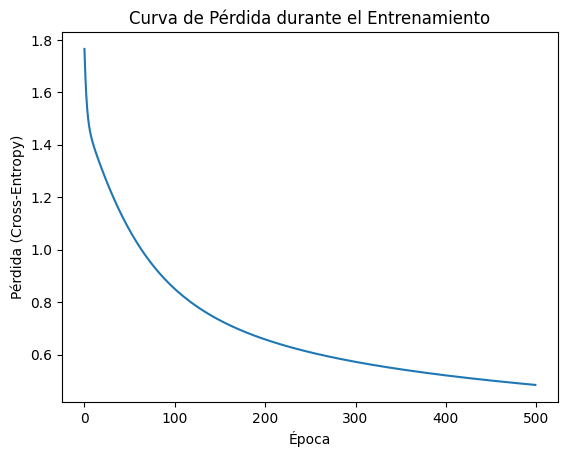

In [105]:


plt.plot(cost_history)
plt.xlabel("Época")
plt.ylabel("Pérdida (Cross-Entropy)")
plt.title("Curva de Pérdida durante el Entrenamiento")
plt.show()


In [106]:
# Calcular Z_test usando los pesos finales
Z_test = X_test @ theta_final

# Aplicar Softmax para obtener probabilidades
def softmax(Matriz_Z):
    exp_Z = np.exp(Matriz_Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

probabilidades_test = softmax(Z_test)

# Obtener la clase predicha (índice del mayor valor)
y_pred_test = np.argmax(probabilidades_test, axis=1)

# Comparar con y_test y calcular precisión
precision = np.mean(y_pred_test == y_test)
print("Precisión en test set:", precision)

#ver la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Matriz de confusión:\n", cm)


Precisión en test set: 0.9
Matriz de confusión:
 [[10  0  0]
 [ 0  7  3]
 [ 0  0 10]]


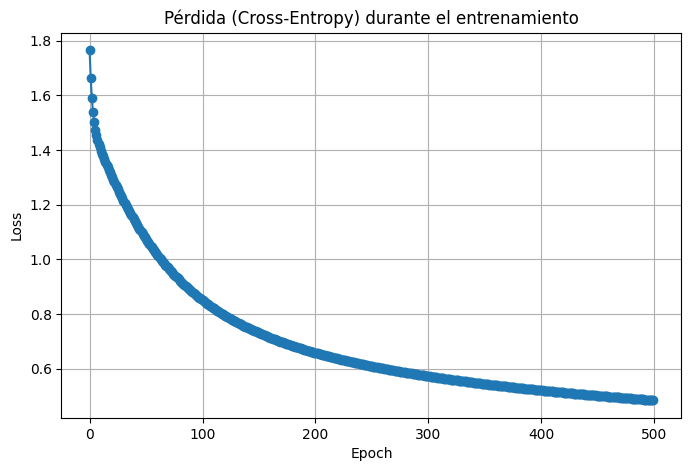

In [107]:
# Graficar pérdida vs epochs
plt.figure(figsize=(8,5))
plt.plot(cost_history, marker='o')
plt.title("Pérdida (Cross-Entropy) durante el entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()